In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Zad

Na podstawie danych food, określić podobieństwo między zwyczajami jedzeniowymi mieszkańców krajów Wielkiej Brytanii.

Dla poniższych danych 

 * znajdż optymalną ilość wymiaów i zredukuj wymiar danyc
 * ponadto zmniejsz wymiar danych do 2 i zwizualizuj dane

In [2]:
import pandas as pd
food = pd.read_csv("datasets/food.txt",delimiter=" ",comment="#")
food

,food,England,Wales,Scotland,Ireland
0,Cheese,105,103,103,66
1,Carcass-meat,245,227,242,267
2,Other-meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats-and-oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh-potatoes,720,874,566,1033
7,Fresh-Veg,253,265,171,143
8,Other-Veg,488,570,418,355
9,Processed-potatoes,198,203,220,187


In [3]:
X = np.array(food)[:,1:].T.astype("float") # Wiersze to kraje
print(X.shape)
y = food.columns[1:]
print(y)

(4, 17)
Index(['England', 'Wales', 'Scotland', 'Ireland'], dtype='object')


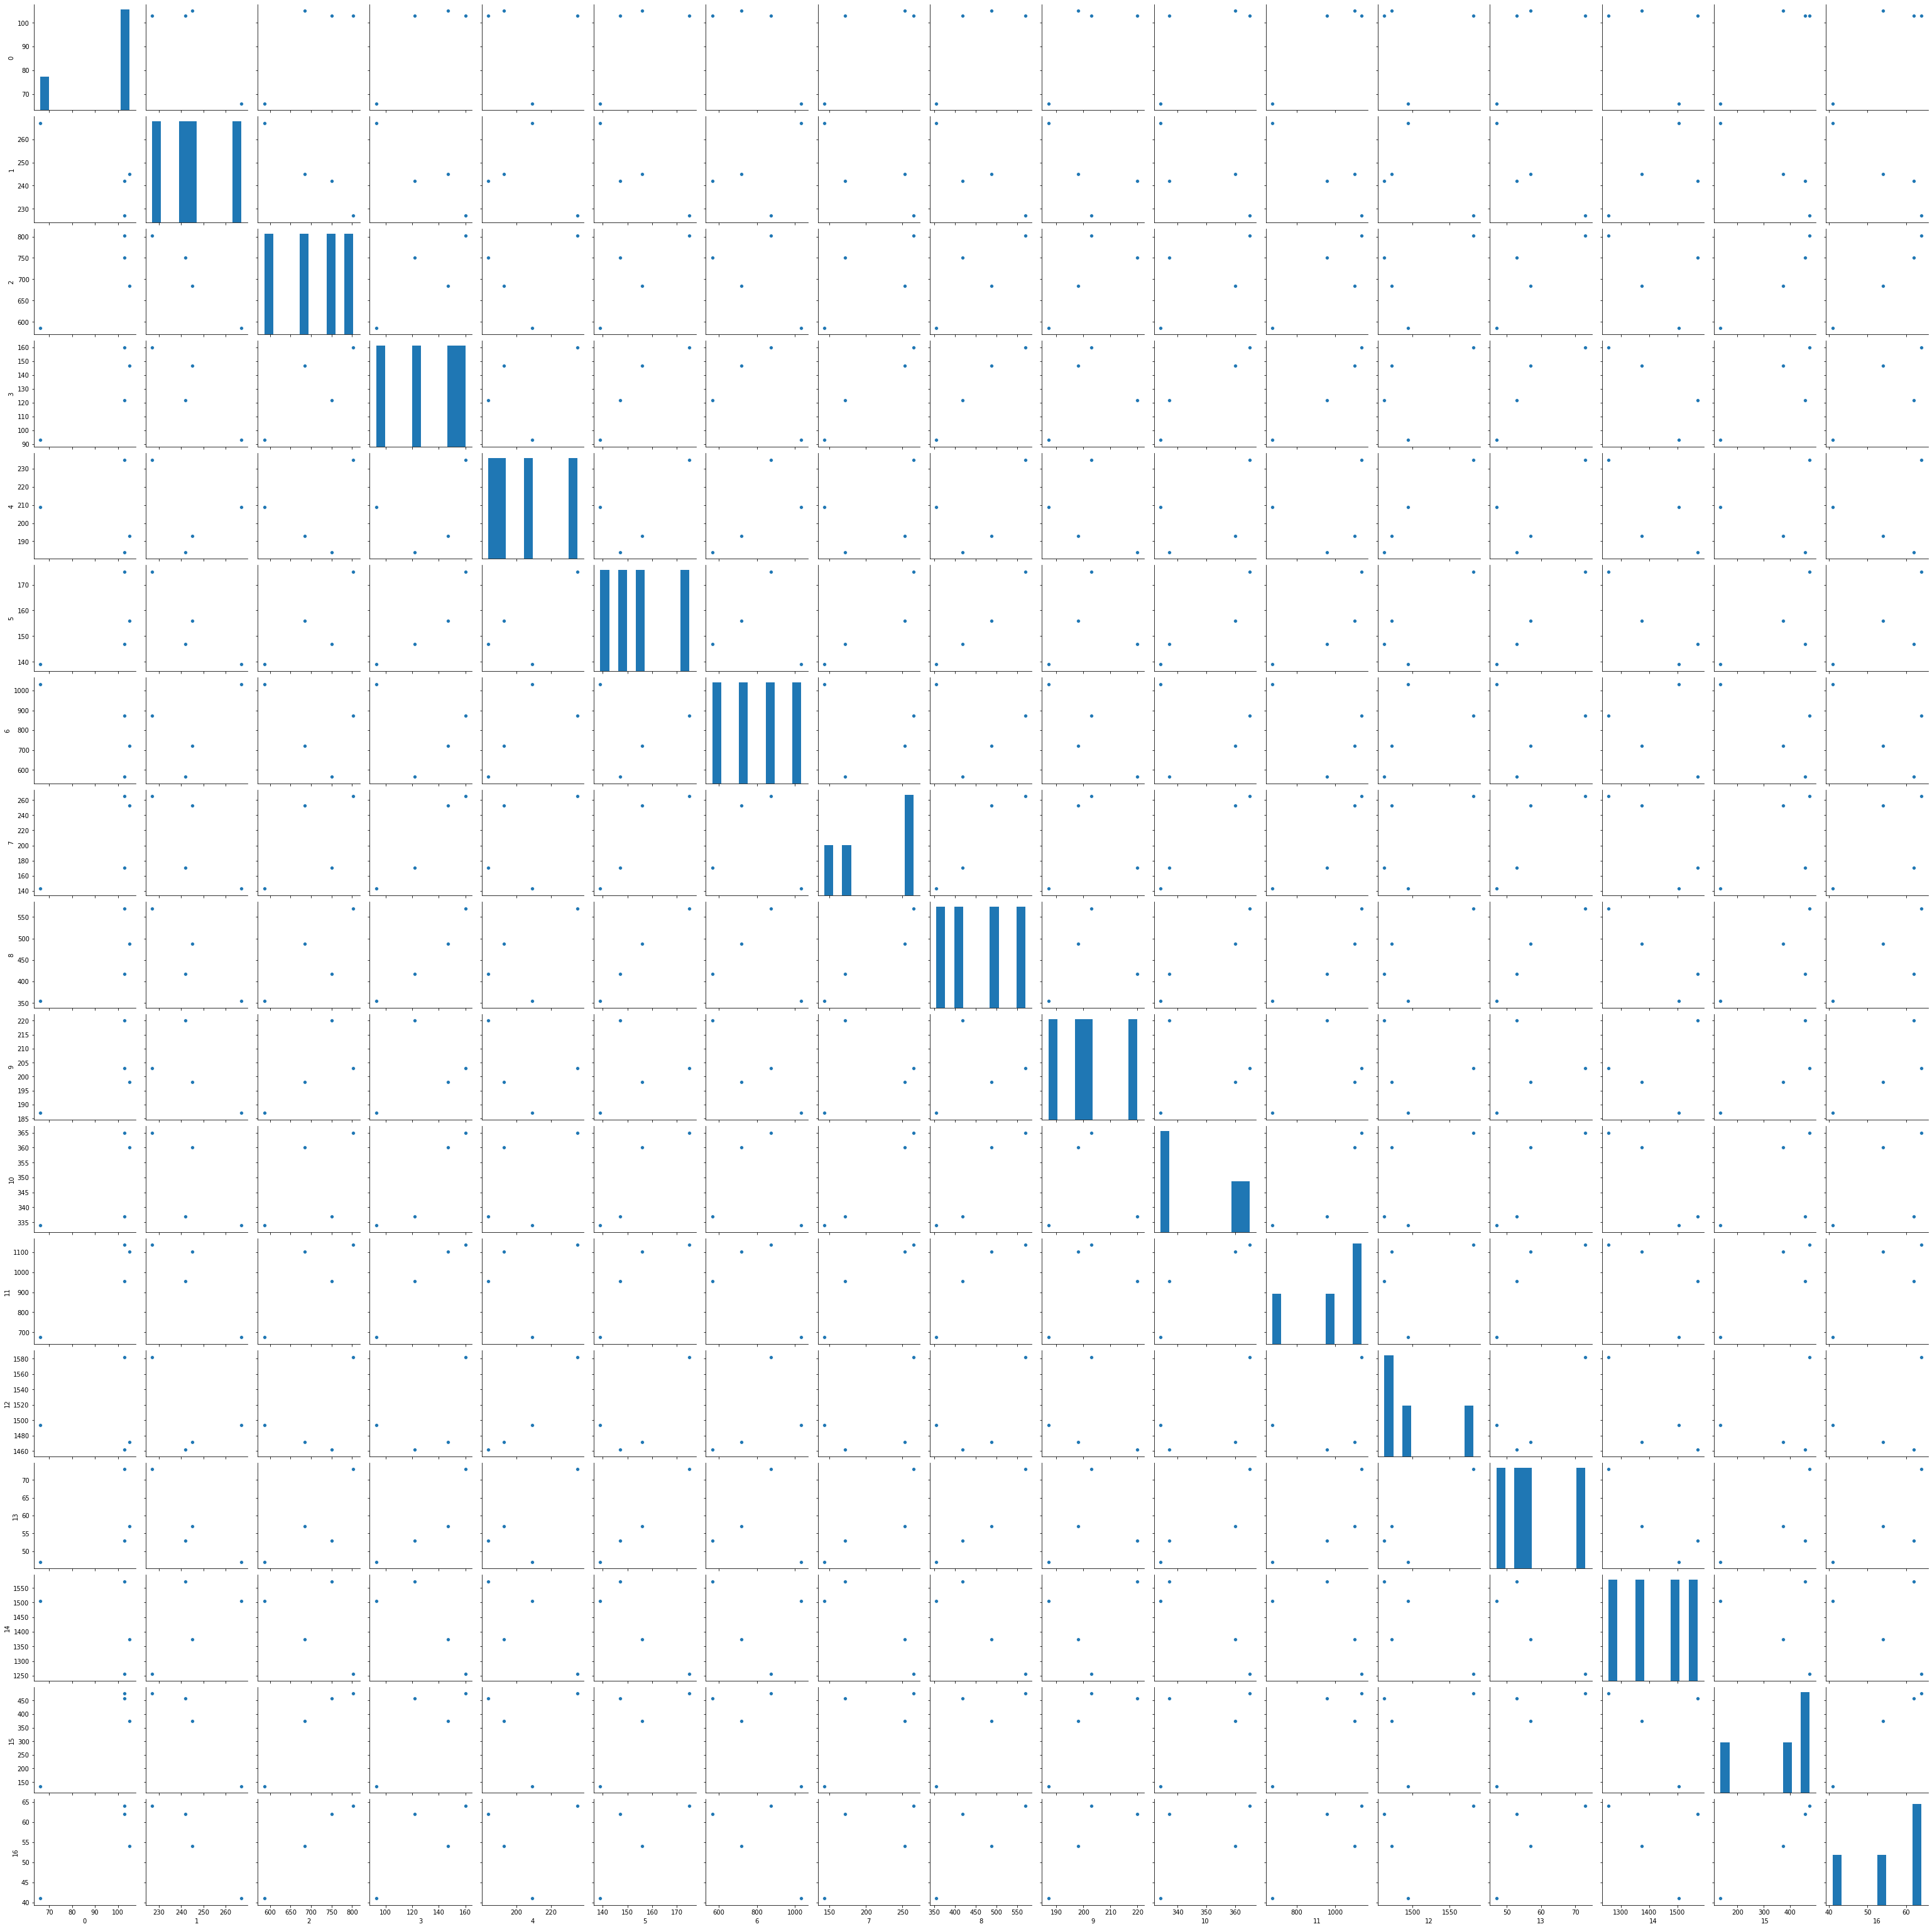

In [4]:
df=pd.DataFrame(X)
sns.pairplot(df)
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

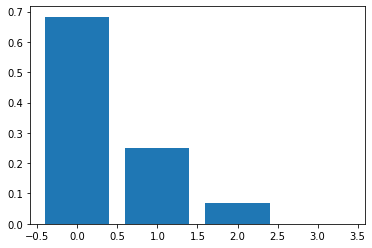

In [6]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_std)
plt.bar(range(4),pca.explained_variance_ratio_)
plt.show()

In [7]:
pca.explained_variance_ratio_

array([6.83278713e-01, 2.48712884e-01, 6.80084029e-02, 1.16614723e-33])

## Odpowiedź: 2 wymiary są wystarczające

# Zad
Zwizualizuj dane w 2D

In [8]:
pca_2 = PCA(2)
X_std_2 = pca_2.fit_transform(X_std)

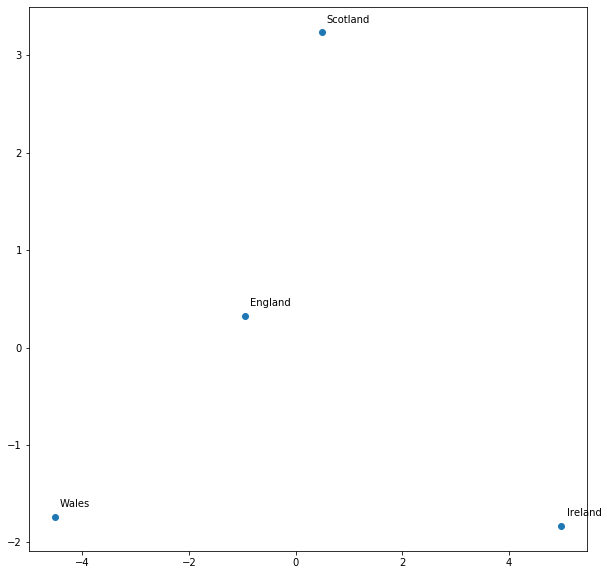

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(X_std_2[:,0],X_std_2[:,1])#, c = y)
for i in range(X_std_2.shape[0]):
    plt.annotate(y[i],xy=(X_std_2[i,0],X_std_2[i,1]), xytext = (X_std_2[i,0]+0.1,X_std_2[i,1]+0.1))
plt.show()

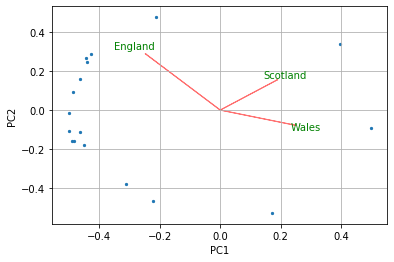

In [36]:
# import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

features = ['England', 'Wales', 'Scotland','Ireland']

pca = PCA(n_components=3)
components = pca.fit_transform(X_std)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(pca.components_.T,np.transpose(pca.components_.T),list(features))
plt.show()

In [37]:
# http://dwoll.de/rexrepos/posts/multFA.html
